# modeling

In [1]:
import pandas as pd

## train test split

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
train_test = pd.read_pickle('../data/train_test.pkl.gz')

In [4]:
districts = train_test[['district']]

In [5]:
districts.nunique()

district    42
dtype: int64

In [6]:
X = train_test.drop(['district', 'outbreak'], axis=1)

In [7]:
y = train_test['outbreak']

In [8]:
y.value_counts()

0.0    2319
1.0      77
Name: outbreak, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf = RandomForestClassifier(random_state=42)

In [12]:
%%time

rf.fit(X_train, y_train)

CPU times: user 410 ms, sys: 138 µs, total: 410 ms
Wall time: 409 ms


RandomForestClassifier(random_state=42)

In [13]:
y_pred = rf.predict(X_test)

## evaluation

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from matplotlib import pyplot

In [15]:
print(confusion_matrix(y_test, y_pred))

[[583   1]
 [ 15   0]]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       584
         1.0       0.00      0.00      0.00        15

    accuracy                           0.97       599
   macro avg       0.49      0.50      0.49       599
weighted avg       0.95      0.97      0.96       599



In [17]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [18]:
auc = roc_auc_score(y_test, y_pred_proba)

In [19]:
auc

0.6506849315068494

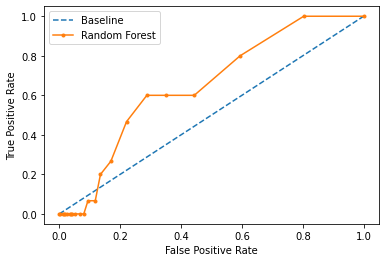

In [20]:
baseline = [0 for _ in range(len(y_test))]
baseline_auc = roc_auc_score(y_test, baseline)

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_proba)

pyplot.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Baseline')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

## SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [22]:
oversample = SMOTE(sampling_strategy=0.1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [23]:
X_train.shape

(1908, 11)

In [24]:
y_train.value_counts()

0.0    1735
1.0     173
Name: outbreak, dtype: int64

In [25]:
rf = RandomForestClassifier(random_state=42)

In [26]:
%%time

rf.fit(X_train, y_train)

CPU times: user 410 ms, sys: 7.91 ms, total: 418 ms
Wall time: 417 ms


RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))

[[580   4]
 [ 15   0]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       584
         1.0       0.00      0.00      0.00        15

    accuracy                           0.97       599
   macro avg       0.49      0.50      0.49       599
weighted avg       0.95      0.97      0.96       599



In [30]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [31]:
auc = roc_auc_score(y_test, y_pred_proba)

In [32]:
auc

0.6547374429223743

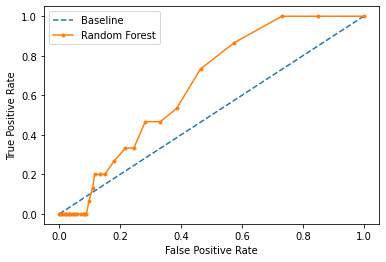

In [33]:
baseline = [0 for _ in range(len(y_test))]
baseline_auc = roc_auc_score(y_test, baseline)

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_proba)

pyplot.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Baseline')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

## cross validation

## hyperparameter tuning